In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('E:\\Datasets\\heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

IndexError: index 13 is out of bounds for axis 0 with size 13

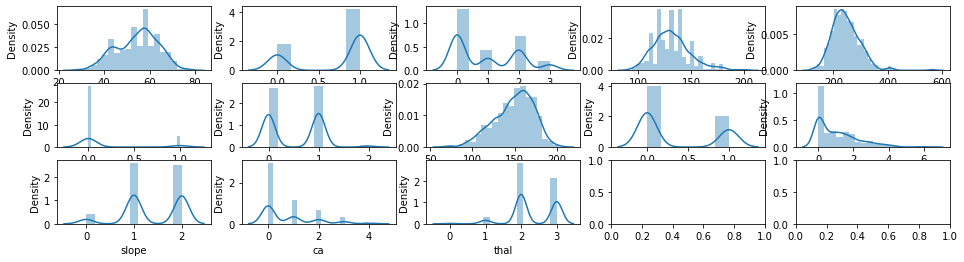

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
model_data=data.copy()
data=data.drop('target',axis=1)
row=3
cols=5

col=data.columns
fig,ax=plt.subplots(nrows=row,ncols=cols,figsize=(16,4))
index=0
for i in range(row):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [ ]:

row=3
cols=5

col=data.columns
fig,ax=plt.subplots(nrows=row,ncols=cols,figsize=(16,4))
index=0
for i in range(row):
    for j in range(cols):
        sns.boxplot(data[col[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [9]:
target=model_data['target']
feature=model_data.drop('target',axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler
sclr=StandardScaler()
sclr.fit(feature.values)
scaled_data=sclr.transform(feature.values)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,target.values,test_size=0.2)

## Model

In [12]:
from sklearn.svm import SVC
model=SVC(kernel='rbf',gamma=.10,C=1.0)

In [13]:
model.fit(x_train,y_train)

SVC(gamma=0.1)

In [14]:
pred=model.predict(x_test)

In [15]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       101
           1       0.97      0.94      0.96       104

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [16]:
accuracy_score(y_test,pred)

0.9560975609756097